<a href="https://colab.research.google.com/github/MikaZico36/DECDProject/blob/main/DECDPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os


numeroContratosContador_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/contadores-de-energia-atual.csv', sep =";", low_memory=False)
energiaConsumida_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/3-consumos-faturados-por-municipio-ultimos-10-anos.csv', sep =";")
numeroOrdensServico_df = pd.read_csv('https://raw.githubusercontent.com/CarolinaSS98/project_decd/main/15-ordens-de-servico.csv', sep =";")

#numeroContratosContador2023_df = numeroContratosContador_df[numeroContratosContador_df['Ano'] == 2023]
#energiaConsumida2023_df = energiaConsumida_df[energiaConsumida_df['Ano'] == 2023]
#numeroOrdensServico2023_df = numeroOrdensServico_df[numeroOrdensServico_df['Ano'] == 2023]


### Tratar Coleção - Número de Contratos Ativos por Tipo de Contador

#### Agregar dados por "data" e "Concelho"

Os números de CPE's foram separados em duas colunas:

- Número de CPEs=SIM : representa o número de CPE's ***com contadores inteligentes***.
- Número de CPEs=NAO : representa o número de CPE's ***sem contadores inteligentes***.

In [6]:
# Filtrando os dados para separar os CPEs com e sem contador inteligente
df_sim = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'SIM']
df_nao = numeroContratosContador_df[numeroContratosContador_df['Inclui contador inteligente'] == 'NÃO']

# Agrupando os dados por data e concelho e contando o número de CPEs para cada grupo
contadoresAgregados_df = pd.DataFrame({
    'Num_CPEs_Inteligentes': df_sim.groupby(['data','Concelho'])["Número de CPE's"].sum(),
    'Num_CPEs_Nao_Inteligentes': df_nao.groupby(['data','Concelho'])["Número de CPE's"].sum()
}).reset_index()

contadoresAgregados_df.rename(columns={'data': 'Data'}, inplace=True)

# Imprimindo o DataFrame resultante
contadoresAgregados_df.head(100)
#contadoresAgregados_df.info()

,Data,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes
0,2022-03,Abrantes,13331,11795
1,2022-03,Aguiar da Beira,2331,2587
2,2022-03,Alandroal,1977,2121
3,2022-03,Albergaria-a-Velha,5596,8525
4,2022-03,Albufeira,28711,24554
...,...,...,...,...
95,2022-03,Freixo de Espada À Cinta,1803,1730
96,2022-03,Fronteira,2057,469
97,2022-03,Fundão,17512,6518
98,2022-03,Gavião,1863,1664


### Tratar Coleção - Consumo de Energia Consumida

####Agregar dados por "data" e "Concelho"

O valor de  Energia Ativa (kWh) foi separado em duas colunas:
- **Energia_Ativa_Baixa_Tensao** : represneta o valor de energia consumida com nível de tensão baixo.
- **Energia_Ativa_Outra_Tensao** : represneta o valor de energia consumida com nível de tensão Média, Alta e Muito Alta Tensão

In [4]:
# Filtrando os dados para separar a Energia Consumida por nível de tensão
df_baixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Baixa Tensão"]
df_acimaBaixa = energiaConsumida_df[energiaConsumida_df['Nível de Tensão'] == "Muito Alta, Alta e Média Tensões"]

# Agrupando os dados por data e concelho e sumando o valor de energia consumida por cada um dos grupos
energiaAgregada_df = pd.DataFrame({
    'Energia_Consumida_Baixa_T': df_baixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum(),
    'Energia_Consumida_Superior_Baixa_T': df_acimaBaixa.groupby(['Data','Concelho'])['Energia Ativa (kWh)'].sum()
}).reset_index()


# Imprimir infor do DataFrame agregado dos consumos
energiaAgregada_df.head()

,Data,Concelho,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T
0,2020-11,Abrantes,6.028607e+06,9.314171e+06
1,2020-11,Aguiar da Beira,1.065748e+06,2.623619e+05
2,2020-11,Alandroal,1.110645e+06,1.498483e+05
3,2020-11,Albergaria-a-Velha,4.153435e+06,1.144006e+07
4,2020-11,Albufeira,1.534018e+07,5.047671e+06


#### Tratar valores Null Detetados

Dado terem sido detetados valores a NULL nas colunas de Energia Consumida de nível > Baixa Tensão, indica que existem concelhos onde não existe consumo deste nível de tensão.

A forma de tratar estes valores a null é colocá-los com o valor da mediana da coluna.

In [11]:
#mostra quais sao as linhas onde aparecem valores de colunas a NaN
#linhas_valor_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].isnull()]
#linhas_valor_null.head()

linhas_not_null = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].notna()]
#linhas_not_null.info()
#linhas_not_null.head()
mediana_acimaBaixa = linhas_not_null['Energia_Consumida_Superior_Baixa_T'].median()
#print(mediana_acimaBaixa)
energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].fillna(mediana_acimaBaixa, inplace=True)

energiaAgregada_df.info()

# energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] = energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'].replace(np.nan, 0)

#energiaAgregada_df.info()

# linhas_valor_zero = energiaAgregada_df[energiaAgregada_df['Energia_Consumida_Superior_Baixa_T'] == 0]

# linhas_valor_zero.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data                                11398 non-null  object 
 1   Concelho                            11398 non-null  object 
 2   Energia_Consumida_Baixa_T           11398 non-null  float64
 3   Energia_Consumida_Superior_Baixa_T  11398 non-null  float64
dtypes: float64(2), object(2)
memory usage: 356.3+ KB


In [12]:
energiaAgregada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data                                11398 non-null  object 
 1   Concelho                            11398 non-null  object 
 2   Energia_Consumida_Baixa_T           11398 non-null  float64
 3   Energia_Consumida_Superior_Baixa_T  11398 non-null  float64
dtypes: float64(2), object(2)
memory usage: 356.3+ KB


### Tratar Coleção - Nº de Ordens de Serviço

####Agregar dados por "data" e "Concelho"

Não nos pareceu relevante agregar por concelho, contado o numero total de ordens de serviço por tipo e por isso vamos diretamente somar o número de ordens de serviço por concelho, ignorando a sua tipologia

In [13]:
numeroOrdensServicoAgregado_df = pd.DataFrame({
    'Numero_total_ordens_servico': numeroOrdensServico_df.groupby(['data','Concelho'])['Ordens Serviço Realizadas (#)'].sum(),
}).reset_index()

numeroOrdensServicoAgregado_df.rename(columns={'data': 'Data'}, inplace=True)

numeroOrdensServicoAgregado_df.head(100)

numeroOrdensServicoAgregado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Data                         7227 non-null   object
 1   Concelho                     7227 non-null   object
 2   Numero_total_ordens_servico  7227 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 169.5+ KB


In [14]:
merged_aux = pd.merge(contadoresAgregados_df,energiaAgregada_df, on=['Data','Concelho'], how='inner')
merged_df = pd.merge(merged_aux,numeroOrdensServicoAgregado_df, on=['Data','Concelho'], how='inner')

#merged_df.head()

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Data                                6825 non-null   object 
 1   Concelho                            6825 non-null   object 
 2   Num_CPEs_Inteligentes               6825 non-null   int64  
 3   Num_CPEs_Nao_Inteligentes           6825 non-null   int64  
 4   Energia_Consumida_Baixa_T           6825 non-null   float64
 5   Energia_Consumida_Superior_Baixa_T  6825 non-null   float64
 6   Numero_total_ordens_servico         6825 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 373.4+ KB


In [15]:
merged_df['Ano'] = merged_df.Data.str[:4]
merged_df['Mes'] = merged_df.Data.str[5:]
merged_df = merged_df.drop('Data', axis = 1)

In [18]:
merged_df.Concelho = merged_df.Concelho.astype('category')
merged_df.Mes = merged_df.Mes.astype('category')
merged_df.Ano = merged_df.Ano.astype('category')

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6825 non-null   category
 1   Num_CPEs_Inteligentes               6825 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6825 non-null   int64   
 3   Energia_Consumida_Baixa_T           6825 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6825 non-null   float64 
 5   Numero_total_ordens_servico         6825 non-null   int64   
 6   Ano                                 6825 non-null   category
 7   Mes                                 6825 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 304.1 KB


In [37]:
target = {k: v for k, v in enumerate(merged_df['Numero_total_ordens_servico'].unique())}

In [38]:
merged_df.head(100)

,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico,Ano,Mes
0,Abrantes,13331,11795,6.376950e+06,7.157803e+06,150,2022,03
1,Aguiar da Beira,2331,2587,1.074397e+06,2.613668e+05,9,2022,03
2,Alandroal,1977,2121,1.258384e+06,2.074845e+05,23,2022,03
3,Albergaria-a-Velha,5596,8525,4.441889e+06,1.406621e+07,52,2022,03
4,Albufeira,28711,24554,1.840090e+07,7.379642e+06,385,2022,03
...,...,...,...,...,...,...,...,...
95,Fundão,17512,6518,5.787765e+06,2.465204e+06,130,2022,03
96,Gavião,1863,1664,7.258333e+05,1.600605e+05,25,2022,03
97,Golegã,2619,1518,1.186724e+06,6.717029e+05,26,2022,03
98,Gondomar,37393,45385,2.583512e+07,7.833737e+06,405,2022,03


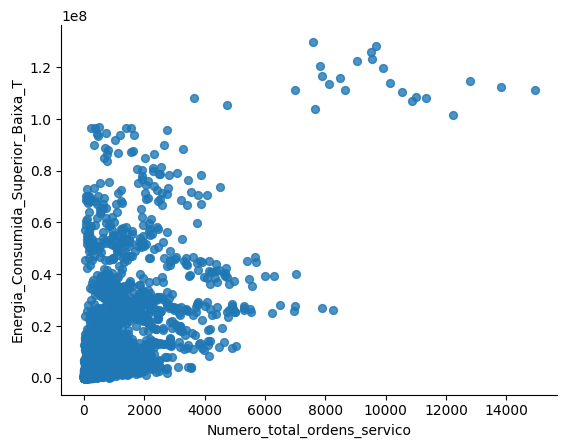

In [40]:
# @title Energia_Consumida_Superior_Baixa_T vs Numero_total_ordens_servico

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter',x='Numero_total_ordens_servico', y='Energia_Consumida_Superior_Baixa_T', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

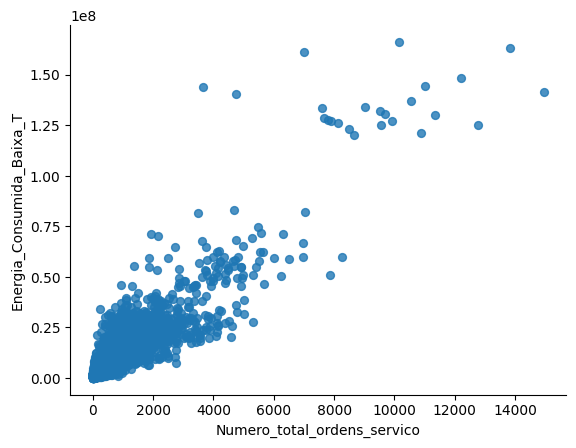

In [41]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter',x='Numero_total_ordens_servico', y='Energia_Consumida_Baixa_T', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

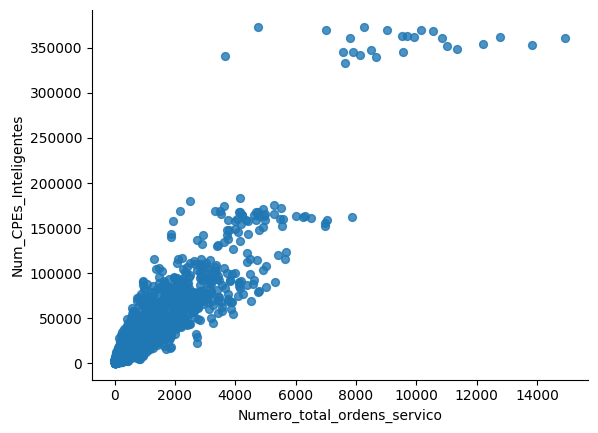

In [42]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter',x='Numero_total_ordens_servico', y='Num_CPEs_Inteligentes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

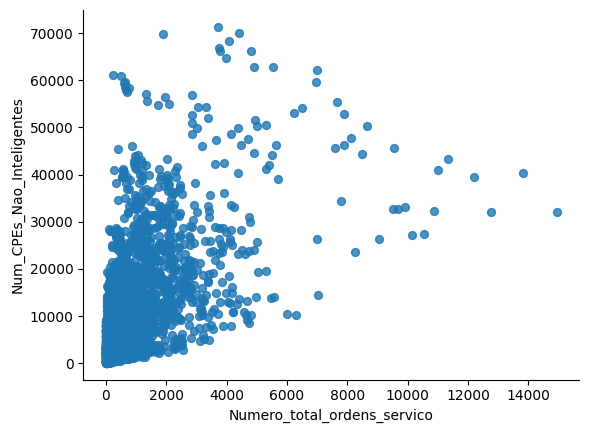

In [43]:
from matplotlib import pyplot as plt
merged_df.plot(kind='scatter',x='Numero_total_ordens_servico', y='Num_CPEs_Nao_Inteligentes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Procurar outliers

In [23]:
def find_outliers(f):
    q1 = f.quantile(0.25)
    q3 = f.quantile(0.75)
    iqr = q3 - q1
    return f[(f < (q1 - 1.5 * iqr)) | (f > (q3 + 1.5 * iqr))]

    find_outliers(merged_df["Num_CPEs_Inteligentes"])
    find_outliers(merged_df["Num_CPEs_Nao_Inteligentes"])
    find_outliers(merged_df["Energia_Consumida_Baixa_T"])
    find_outliers(merged_df["Energia_Consumida_Superior_Baixa_T"])
    find_outliers(merged_df["Numero_total_ordens_servico"])



In [24]:
    find_outliers(merged_df["Num_CPEs_Inteligentes"])


15       82799
23       74381
35       41212
41       40141
49       72642
         ...  
6800     71710
6803     51205
6805    142553
6815     40538
6818     55547
Name: Num_CPEs_Inteligentes, Length: 667, dtype: int64

In [25]:
    find_outliers(merged_df["Num_CPEs_Nao_Inteligentes"])


4       24554
15      32683
23      23632
39      28012
49      31740
        ...  
6650    22126
6661    23647
6662    20629
6768    33524
6805    21536
Name: Num_CPEs_Nao_Inteligentes, Length: 543, dtype: int64

In [26]:
    find_outliers(merged_df["Energia_Consumida_Baixa_T"])


4       1.840090e+07
15      2.917151e+07
23      2.312812e+07
35      1.621294e+07
39      2.103857e+07
            ...     
6612    2.052034e+07
6661    5.986701e+07
6738    3.205345e+07
6768    2.569081e+07
6805    2.494970e+07
Name: Energia_Consumida_Baixa_T, Length: 683, dtype: float64

In [27]:
    find_outliers(merged_df["Energia_Consumida_Superior_Baixa_T"])


14      1.548058e+07
23      1.895628e+07
35      5.083744e+07
39      1.791604e+07
43      3.007738e+07
            ...     
6532    4.009657e+07
6542    1.651112e+07
6548    1.743294e+07
6661    2.603624e+07
6738    1.641147e+07
Name: Energia_Consumida_Superior_Baixa_T, Length: 820, dtype: float64

In [28]:
    find_outliers(merged_df["Numero_total_ordens_servico"])


23      1057
109     3663
186     1948
216     1882
253     1380
        ... 
6764    1777
6768    4161
6800    1615
6803    1058
6805    2917
Name: Numero_total_ordens_servico, Length: 763, dtype: int64

#Tranformar os dados totalmente categóricos

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Concelho                            6825 non-null   category
 1   Num_CPEs_Inteligentes               6825 non-null   int64   
 2   Num_CPEs_Nao_Inteligentes           6825 non-null   int64   
 3   Energia_Consumida_Baixa_T           6825 non-null   float64 
 4   Energia_Consumida_Superior_Baixa_T  6825 non-null   float64 
 5   Numero_total_ordens_servico         6825 non-null   int64   
 6   Ano                                 6825 non-null   category
 7   Mes                                 6825 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 304.1 KB


In [46]:
display(merged_df)

,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico,Ano,Mes
0,Abrantes,13331,11795,6.376950e+06,7.157803e+06,150,2022,03
1,Aguiar da Beira,2331,2587,1.074397e+06,2.613668e+05,9,2022,03
2,Alandroal,1977,2121,1.258384e+06,2.074845e+05,23,2022,03
3,Albergaria-a-Velha,5596,8525,4.441889e+06,1.406621e+07,52,2022,03
4,Albufeira,28711,24554,1.840090e+07,7.379642e+06,385,2022,03
...,...,...,...,...,...,...,...,...
6820,Vouzela,6288,1068,7.938707e+05,3.480269e+05,84,2024,03
6821,Águeda,23452,1452,3.444448e+06,4.043627e+06,440,2024,03
6822,Évora,29498,3736,5.373245e+06,3.613598e+06,520,2024,03
6823,Ílhavo,24727,890,2.974763e+06,3.285015e+06,445,2024,03


#Normalização

**Normalização Min-Max**

       Num_CPEs_Inteligentes  Num_CPEs_Nao_Inteligentes  \
count            6825.000000                6825.000000   
mean                0.043644                   0.090194   
std                 0.082447                   0.118384   
min                 0.000000                   0.000000   
25%                 0.007963                   0.020572   
50%                 0.016359                   0.049101   
75%                 0.046717                   0.111672   
max                 1.000000                   1.000000   

       Energia_Consumida_Baixa_T  Energia_Consumida_Superior_Baixa_T  \
count                6825.000000                         6825.000000   
mean                    0.038604                            0.054129   
std                     0.070679                            0.111009   
min                     0.000000                            0.000000   
25%                     0.006978                            0.003407   
50%                     0.015103    

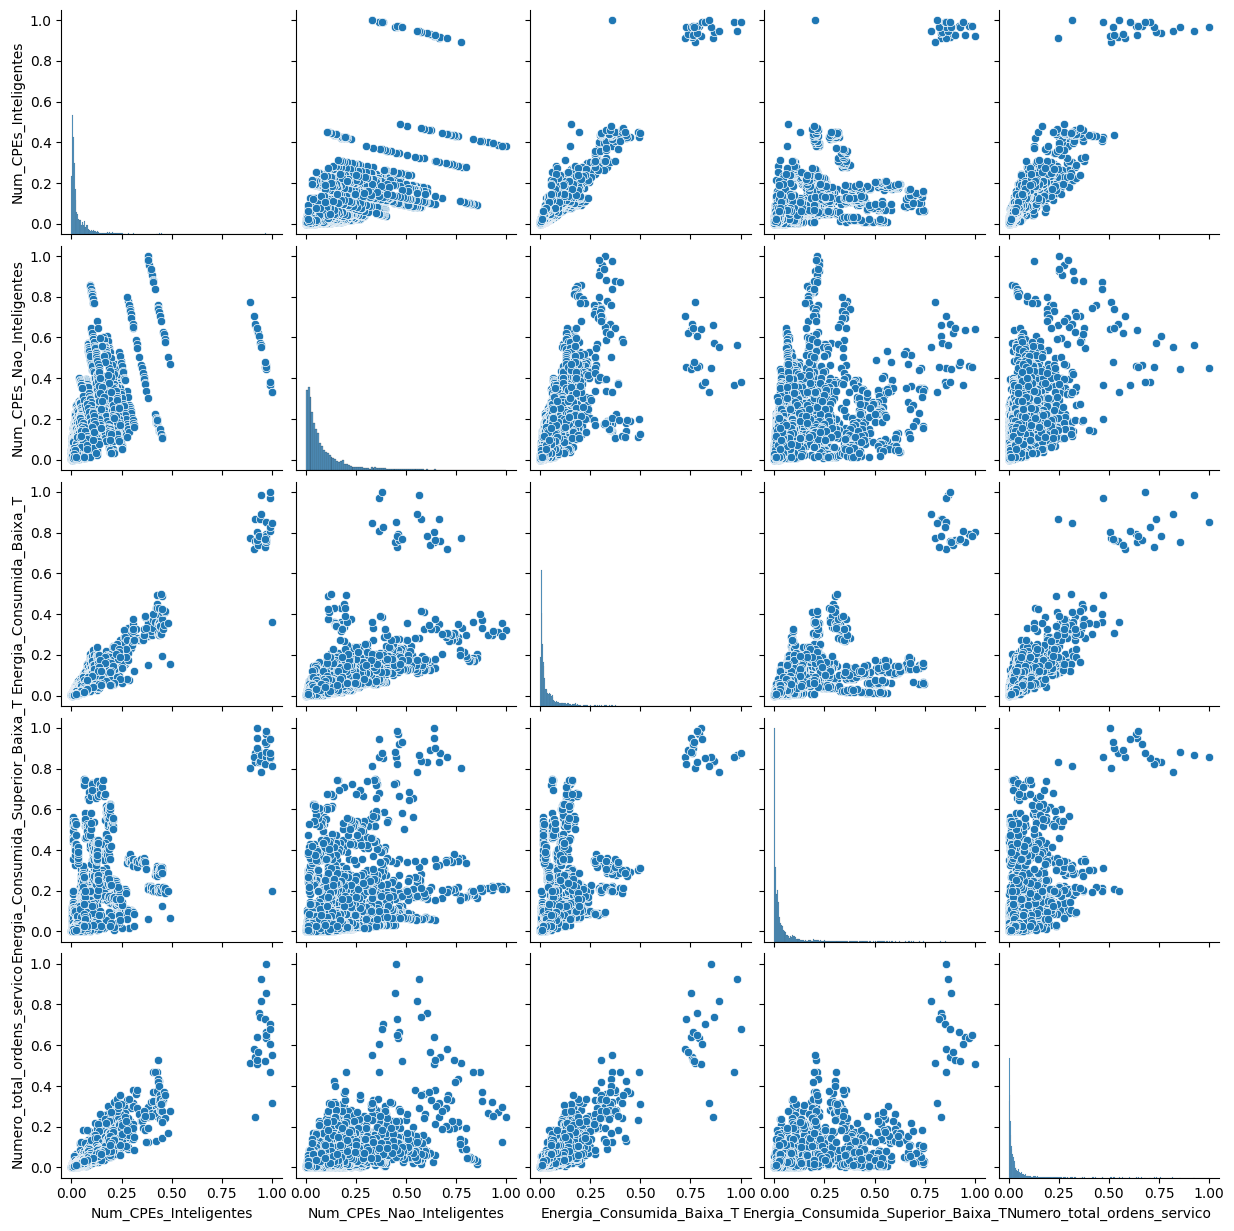

In [48]:
#Normalização Min-Max
from sklearn.preprocessing import MinMaxScaler

# Suponha que numeric_df seja o DataFrame contendo todas as colunas que você deseja normalizar
# Suponha que mes, ano e codigoConcelho sejam as colunas que você deseja manter fora da normalização

# Selecionar apenas as colunas numéricas para normalização
cols_to_normalize = [col for col in merged_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
merged_df_to_normalize = merged_df[cols_to_normalize]

# Normalizar os dados selecionados
minmax_scaler = MinMaxScaler((0, 1))
minmax_scaled_features = minmax_scaler.fit_transform(merged_df_to_normalize)
minmax_scaled = pd.DataFrame(minmax_scaled_features, index=merged_df_to_normalize.index, columns=merged_df_to_normalize.columns)

# Concatenar as colunas mantidas fora da normalização com as colunas normalizadas
cols_to_keep = ['Ano', 'Mes', 'Concelho']
final_df = pd.concat([merged_df[cols_to_keep], minmax_scaled], axis=1)

# Exibir a descrição estatística do DataFrame final
print(final_df.describe())

# Exibir o pairplot do DataFrame final
sns.pairplot(final_df);


**Normalização z-score**

       Num_CPEs_Inteligentes  Num_CPEs_Nao_Inteligentes  \
count           6.825000e+03               6.825000e+03   
mean            8.328706e-18              -1.665741e-17   
std             1.000073e+00               1.000073e+00   
min            -5.294002e-01              -7.619378e-01   
25%            -4.328057e-01              -5.881512e-01   
50%            -3.309679e-01              -3.471496e-01   
75%             3.727009e-02               1.814416e-01   
max             1.160050e+01               7.685801e+00   

       Energia_Consumida_Baixa_T  Energia_Consumida_Superior_Baixa_T  \
count               6.825000e+03                        6.825000e+03   
mean                7.391727e-17                        9.786230e-17   
std                 1.000073e+00                        1.000073e+00   
min                -5.462264e-01                       -4.876433e-01   
25%                -4.474959e-01                       -4.569505e-01   
50%                -3.325218e-01    

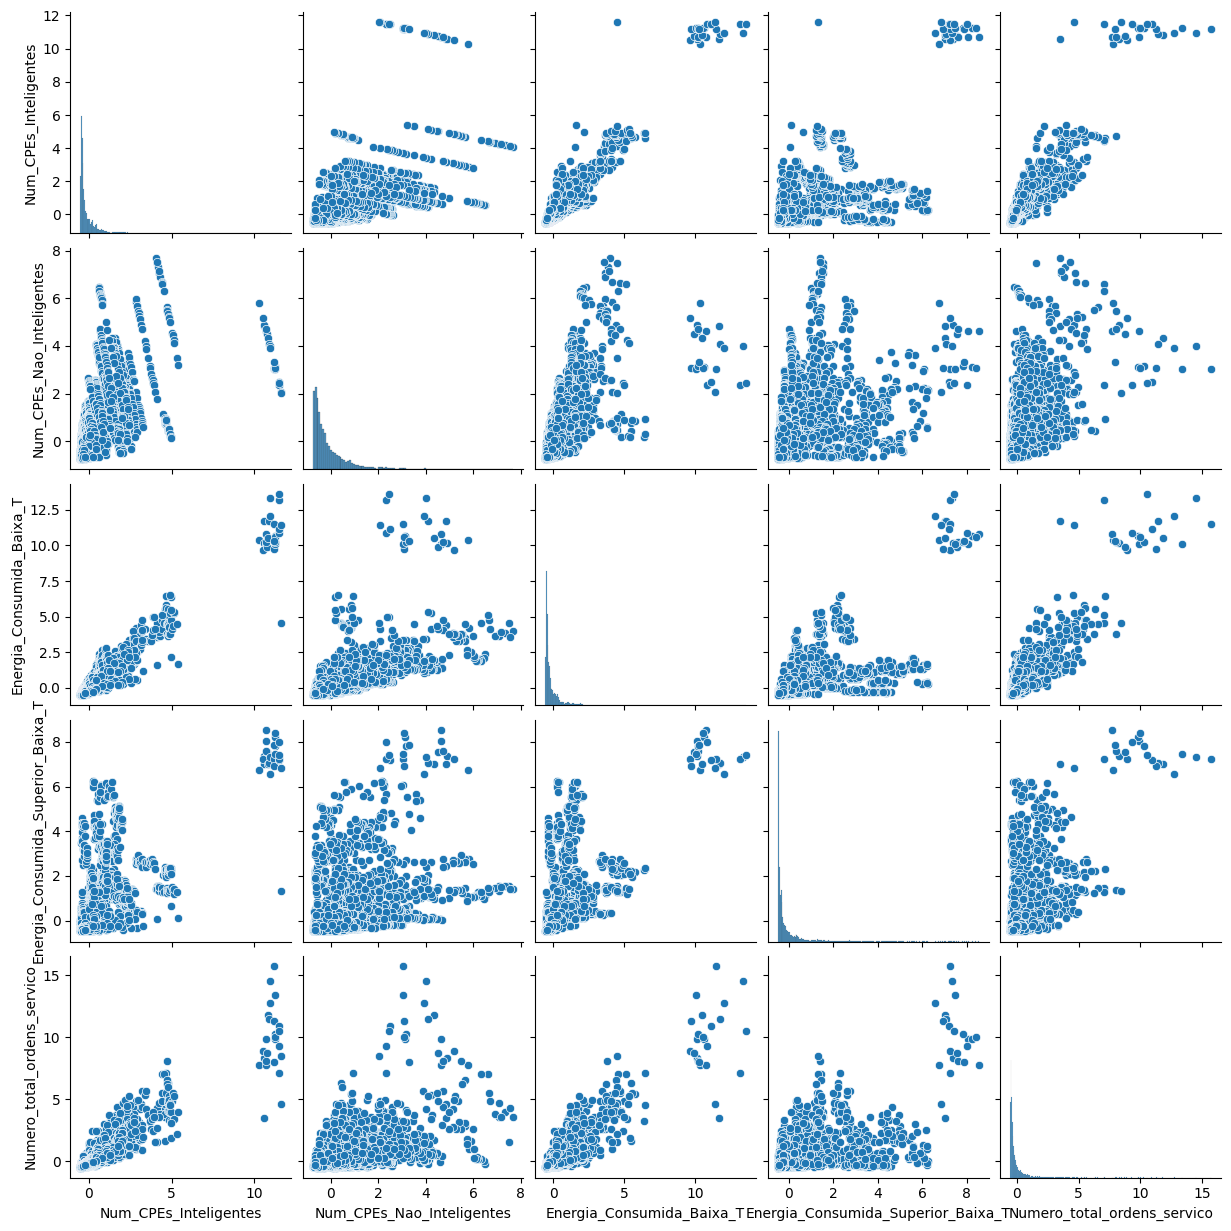

In [50]:
#Normalização z-score
from sklearn.preprocessing import StandardScaler

cols_to_normalize = [col for col in merged_df.columns if col not in ['Ano', 'Mes', 'Concelho']]
merged_df_to_normalize = merged_df[cols_to_normalize]

# Normalizar os dados selecionados
std_scaler = StandardScaler()
std_scaler.fit(merged_df_to_normalize)
scaled_features = std_scaler.transform(merged_df_to_normalize)
std_scaled = pd.DataFrame(scaled_features, index=merged_df_to_normalize.index, columns=merged_df_to_normalize.columns)

# Concatenar as colunas mantidas fora da normalização com as colunas normalizadas
cols_to_keep = ['Ano', 'Mes', 'Concelho']
final_df = pd.concat([merged_df[cols_to_keep], std_scaled], axis=1)

# Exibir a descrição estatística do DataFrame final
print(final_df.describe())

# Exibir o pairplot do DataFrame final
sns.pairplot(final_df);

In [ ]:
category_df= merged_df.copy()
category_df['Num_CPEs_Inteligentes'] = pd.cut(category_df['Num_CPEs_Inteligentes'],
                                                      bins=[0,6000,18000,60000],
                                                      labels=['Baixa', 'Média', 'Alta'])

category_df["Num_CPEs_Nao_Inteligentes"] = pd.cut(category_df["Num_CPEs_Nao_Inteligentes"],
                                                      bins=[0,6000,18000,60000],
                                                      labels=['Baixa', 'Média', 'Alta'])

In [21]:
# aplicar one hot enconding no mes
# nao o fazemos no concelho pq isso aumentaria radicalmente a dimensao

ohenc = pd.get_dummies(merged_df, columns = ['Mes'], dtype=int)
ohenc.head()

,Concelho,Num_CPEs_Inteligentes,Num_CPEs_Nao_Inteligentes,Energia_Consumida_Baixa_T,Energia_Consumida_Superior_Baixa_T,Numero_total_ordens_servico,Ano,Mes_01,Mes_02,Mes_03,Mes_04,Mes_05,Mes_06,Mes_07,Mes_08,Mes_09,Mes_10,Mes_11,Mes_12
0,Abrantes,13331,11795,6.376950e+06,7.157803e+06,150,2022,0,0,1,0,0,0,0,0,0,0,0,0
1,Aguiar da Beira,2331,2587,1.074397e+06,2.613668e+05,9,2022,0,0,1,0,0,0,0,0,0,0,0,0
2,Alandroal,1977,2121,1.258384e+06,2.074845e+05,23,2022,0,0,1,0,0,0,0,0,0,0,0,0
3,Albergaria-a-Velha,5596,8525,4.441889e+06,1.406621e+07,52,2022,0,0,1,0,0,0,0,0,0,0,0,0
4,Albufeira,28711,24554,1.840090e+07,7.379642e+06,385,2022,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
train = ohenc[ohenc.Ano != '2024'].drop('Ano', axis = 1)
test = ohenc[ohenc.Ano == '2024'].drop('Ano', axis = 1)

In [30]:
X_train = train.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1) #drop concelho pra poder usar KNN
X_test = test.drop(['Numero_total_ordens_servico', 'Concelho'], axis=1)

y_train = train.Numero_total_ordens_servico
y_test = test.Numero_total_ordens_servico

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 0 to 6005
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Num_CPEs_Inteligentes               6006 non-null   int64  
 1   Num_CPEs_Nao_Inteligentes           6006 non-null   int64  
 2   Energia_Consumida_Baixa_T           6006 non-null   float64
 3   Energia_Consumida_Superior_Baixa_T  6006 non-null   float64
 4   Mes_01                              6006 non-null   int64  
 5   Mes_02                              6006 non-null   int64  
 6   Mes_03                              6006 non-null   int64  
 7   Mes_04                              6006 non-null   int64  
 8   Mes_05                              6006 non-null   int64  
 9   Mes_06                              6006 non-null   int64  
 10  Mes_07                              6006 non-null   int64  
 11  Mes_08                              6006 non-nul

Normalização de Dados - Dados de Treino

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# num_cols = ['Num_CPEs_Inteligentes', 'Num_CPEs_Nao_Inteligentes', 'Energia_Consumida_Baixa_T', 'Energia_Consumida_Superior_Baixa_T']

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn3 = KNeighborsRegressor(3)
knn3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)